In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 7장. 통계분석

# [1] 와인 품질 등급 예측하기

#### p.201
## 4. 데이터준비
### 4.1 다운로드한 CSV 파일 정리하기

In [2]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [6]:
fpath = 'C:/Users/82105/OneDrive/바탕 화면/4-1 강의/SDA41/code/test-git/'

In [7]:
red_df = pd.read_csv(fpath + 'data/winequality-red.csv', sep = ';', header = 0, engine = 'python')

In [8]:
white_df = pd.read_csv(fpath + 'data/winequality-white.csv', sep = ';', header = 0, engine= 'python')

In [9]:
red_df.to_csv(fpath + 'data/winequality-red2.csv',index = False)

In [10]:
white_df.to_csv(fpath + 'data/winequality-white2.csv', index = False)

### 4.2 데이터 병합하기

In [11]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
red_df.insert(0, column = 'type', value = 'red')

In [13]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
red_df.shape

(1599, 13)

In [15]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
white_df.insert(0, column = 'type', value = 'white')

In [17]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
white_df.shape

(4898, 13)

In [19]:
wine = pd.concat([red_df, white_df])

In [20]:
wine.shape

(6497, 13)

In [21]:
wine.to_csv(fpath + 'data/wine.csv', index = False)

## 5. 데이터 탐색

In [22]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


#### 컬럼이름의 띄어쓰기를 밑줄로 바꾸기

In [ ]:
wine.columns = wine.columns.str.replace(' ', '_') #띄어쓰기 언더바로 대치

In [24]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
sorted(wine.quality.unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [27]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

## 6. 데이터 모델링

### 6.1 describe( ) 함수로 그룹 비교하기

In [28]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [29]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [30]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [31]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


### 6.2 t-검정과 회귀 분석으로 그룹 비교하기

In [1]:
# 한번만 실행
!pip install statsmodels

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [35]:
pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.0 MB 8.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/41.0 MB 8.1 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/41.0 MB 8.2 MB/s eta 0:00:05
   ------ --------------------------------- 6.8/41.0 MB 7.9 MB/s eta 0:00:05
   -------- ------------------------------- 8.7/41.0 MB 8.1 MB/s eta 0:00:04
   ---------- ----------------------------- 10.5/41.0 MB 8.1 MB/s eta 0:00:04
   ----------- ---------------------------- 12.1/41.0 MB 8.1 MB/s eta 0:00:04
   ------------- -------------------------- 13.9/41.0 MB 8.2 MB/s eta 0:00:04
   --------------- ------------------------ 15.7/41.0 MB 8.2 MB/s eta 0:00:04
   ----------------- ---------------------- 17.6/41.0 MB 8.2 MB/s eta 0:00:03
   ------------------ --------------------- 19.1/41.0 MB 8.2 MB/s eta 0:00:03
   -------------------- ------------------- 21.0/41.0 MB 8.2 MB/s eta 0:00:03


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from scipy import stats

In [3]:
from statsmodels.formula.api import ols, glm

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

NameError: name 'wine' is not defined

In [33]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [34]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

TtestResult(statistic=np.float64(-10.149363059143164), pvalue=np.float64(8.168348870049682e-24), df=np.float64(2950.750452166697))

In [35]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [36]:
regression_result = ols(Rformula, data = wine).fit()

In [37]:
print(regression_result.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:22:13   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

### 6.3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [38]:
wine.columns.difference(['quality', 'type'])

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

In [39]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]

In [40]:
sample1 = sample1[0:5][:]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [41]:
sample1_predict = regression_result.predict(sample1)

In [42]:
sample1_predict

,0
0,4.997607
1,4.924993
2,5.034663
3,5.680333
4,4.997607


In [43]:
wine[0:5]['quality']

,quality
0,5
1,5
2,5
3,6
4,5


### - 임의의 data로 샘플 만들기

In [44]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}

In [45]:
sample2 = pd.DataFrame(data, columns= sample1.columns)

In [46]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [47]:
sample2_predict = regression_result.predict(sample2)

In [48]:
sample2_predict

,0
0,4.809094
1,7.582129


## 7. 결과 시각화

### 7.1 와인 유형에 따른 품질 등급 히스토그램 그리기

In [49]:
# 한번만 실행
!pip install seaborn

In [50]:
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns

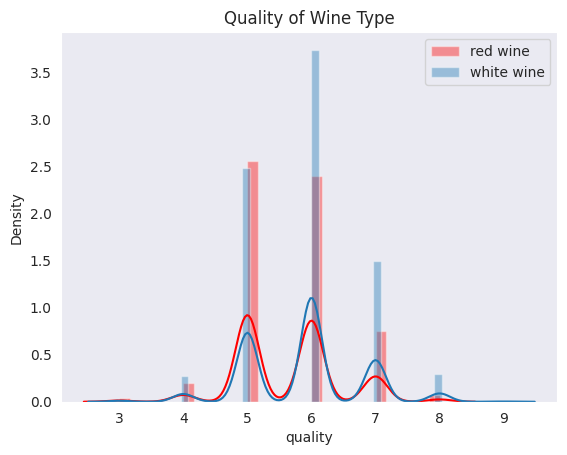

In [52]:
sns.set_style('dark')
sns.distplot(red_wine_quality, kde = True, color = "red", label = 'red wine')
sns.distplot(white_wine_quality, kde = True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

### 7.2 부분 회귀 플롯으로 시각화하기

In [53]:
import statsmodels.api as sm

### - fixed_acidity가 종속 변수 quality에 미치는 영향력을 시각화하기

In [54]:
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

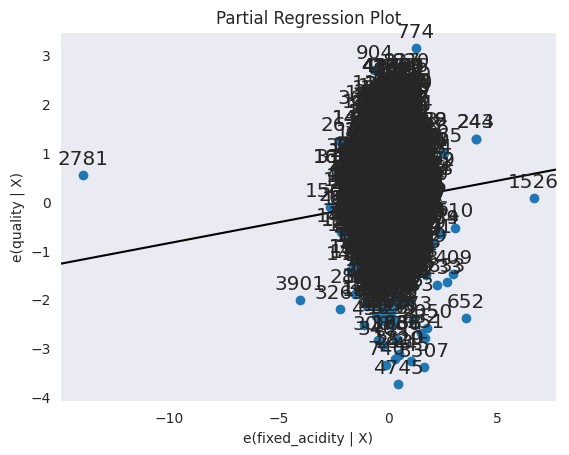

In [55]:
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)

### - 각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화하기

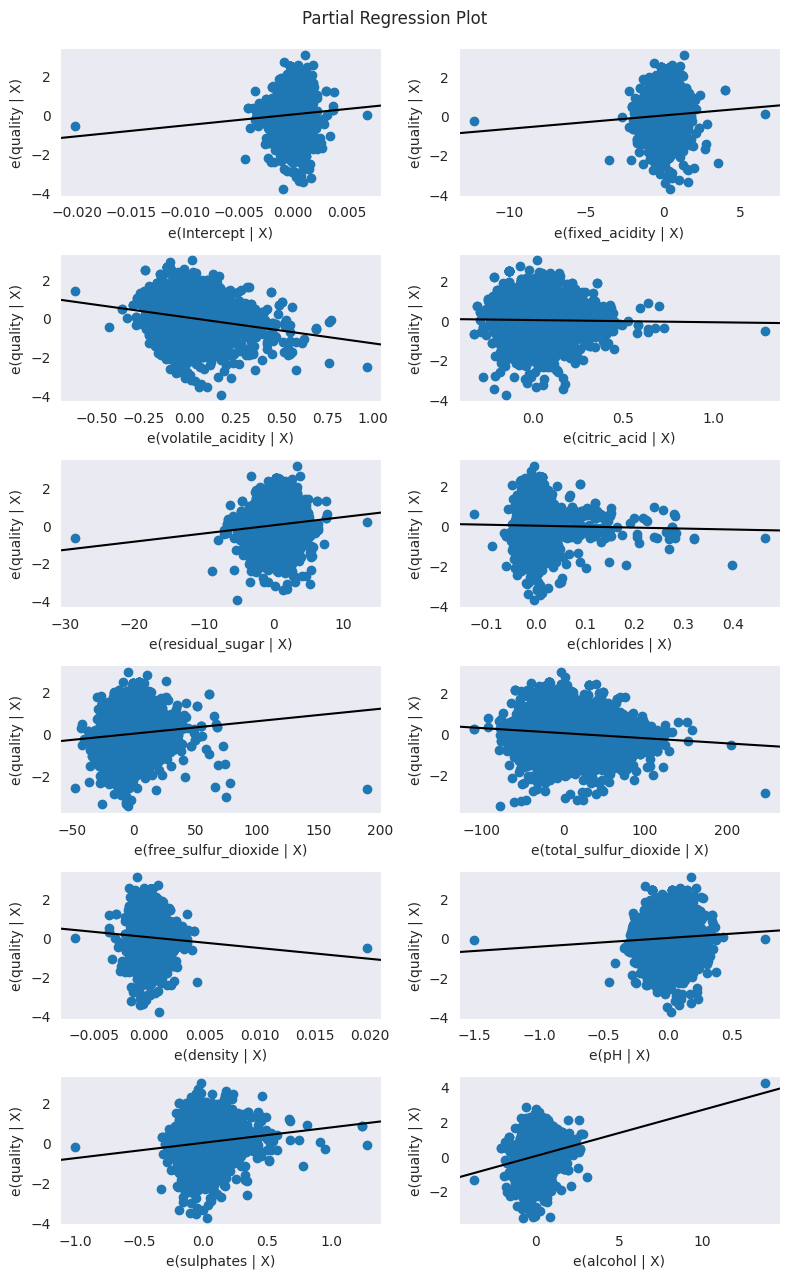

In [56]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

------------------------------------------